In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [629]:
figure = plt.figure(figsize=(27,9))

In [96]:
# h=.2
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

In [100]:
?np.meshgrid

In [97]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

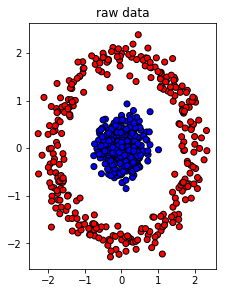

In [101]:
ax = plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.title("raw data")
plt.show()

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(123)

In [103]:
X_train = torch.from_numpy(X_train).double()
y_train = torch.from_numpy(y_train).long()

In [104]:
X_test = torch.from_numpy(X_test).double()
y_test = torch.from_numpy(y_test).long()

## FULLY CONNECTED

In [202]:
# build model
class FCNet(nn.Module):

    def __init__(self):
        super(FCNet, self).__init__()
        self.fc1 = nn.Linear(2, 10) # No. of features
        self.fc2 = nn.Linear(10, 2) # No. of classes
        # loss criterion should be cross entropy loss
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [203]:
# build model
class FCNet2(nn.Module):

    def __init__(self):
        super(FCNet2, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x)) # convert to a number within 0-1 and use BCE
        return x

In [204]:
X_train.shape

torch.Size([600, 2])

In [238]:
## training mode
def training_loop2(X_train, y_train, model, num_epoch, learning_rate):
    model.train()
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.zero_grad()
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        out = model(X_train)
        loss = criterion(out, y_train.unsqueeze(-1).double())
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1,num_epoch, loss.data))
    return model

In [239]:
training_loop2(X_train, y_train, model2, 10000, 0.01)

Epoch [1/10000] Loss: 0.6419
Epoch [501/10000] Loss: 0.0030
Epoch [1001/10000] Loss: 0.0010
Epoch [1501/10000] Loss: 0.0005
Epoch [2001/10000] Loss: 0.0003
Epoch [2501/10000] Loss: 0.0002
Epoch [3001/10000] Loss: 0.0001
Epoch [3501/10000] Loss: 0.0001
Epoch [4001/10000] Loss: 0.0001
Epoch [4501/10000] Loss: 0.0000
Epoch [5001/10000] Loss: 0.0000
Epoch [5501/10000] Loss: 0.0000
Epoch [6001/10000] Loss: 0.0000
Epoch [6501/10000] Loss: 0.0000
Epoch [7001/10000] Loss: 0.0000
Epoch [7501/10000] Loss: 0.0000
Epoch [8001/10000] Loss: 0.0000
Epoch [8501/10000] Loss: 0.0000
Epoch [9001/10000] Loss: 0.0000
Epoch [9501/10000] Loss: 0.0000


FCNet2(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [198]:
## training mode
def training_loop(X_train, y_train, model, num_epoch, learning_rate):
    model.train()
    criterion = nn.CrossEntropyLoss() # softmax is already applied
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.zero_grad()
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        out = model(X_train)
        loss = criterion(out, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, num_epoch, loss.data))
    return model

In [400]:
def prediction_loop(model, x):
    model.eval()
    out = model.forward(x)
    return np.rint(out.data.numpy().max(axis = 1))

In [367]:
model = FCNet().double()
model2 = FCNet2().double()
# model_out = training_loop(X_train, y_train, model, 10000, 0.01)
model2_out = training_loop2(X_train, y_train, model2, 10000, 0.01)

Epoch [1/10000] Loss: 0.8116
Epoch [501/10000] Loss: 0.0027
Epoch [1001/10000] Loss: 0.0008
Epoch [1501/10000] Loss: 0.0004
Epoch [2001/10000] Loss: 0.0002
Epoch [2501/10000] Loss: 0.0001
Epoch [3001/10000] Loss: 0.0001
Epoch [3501/10000] Loss: 0.0001
Epoch [4001/10000] Loss: 0.0000
Epoch [4501/10000] Loss: 0.0000
Epoch [5001/10000] Loss: 0.0000
Epoch [5501/10000] Loss: 0.0000
Epoch [6001/10000] Loss: 0.0000
Epoch [6501/10000] Loss: 0.0000
Epoch [7001/10000] Loss: 0.0000
Epoch [7501/10000] Loss: 0.0000
Epoch [8001/10000] Loss: 0.0000
Epoch [8501/10000] Loss: 0.0000
Epoch [9001/10000] Loss: 0.0000
Epoch [9501/10000] Loss: 0.0000
Epoch [1/10000] Loss: 0.7014
Epoch [501/10000] Loss: 0.0040
Epoch [1001/10000] Loss: 0.0013
Epoch [1501/10000] Loss: 0.0006
Epoch [2001/10000] Loss: 0.0003
Epoch [2501/10000] Loss: 0.0002
Epoch [3001/10000] Loss: 0.0001
Epoch [3501/10000] Loss: 0.0001
Epoch [4001/10000] Loss: 0.0001
Epoch [4501/10000] Loss: 0.0000
Epoch [5001/10000] Loss: 0.0000
Epoch [5501/1000

In [402]:
result = prediction_loop(model2_out, X_test);print(result)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.

In [468]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx = torch.from_numpy(xx).double()
yy = torch.from_numpy(yy).double()
Z = torch.cat((xx.view(-1).unsqueeze(-1), yy.view(-1).unsqueeze(-1)),1) # predict for bounding box

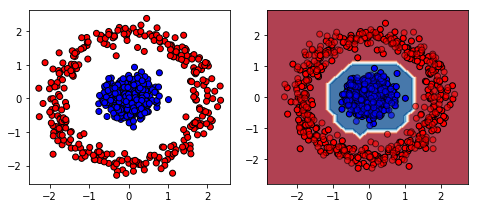

In [469]:
plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax = plt.subplot(1,3,2)
Z = prediction_loop(model2_out, Z)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# ax = plt.subplot(1,3,3)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
plt.tight_layout()
plt.show()

## Approximation using Resnet (relu)

In [564]:
class ResnetBlock(nn.Module):
    
    def __init__(self, input_size):
        super().__init__()
        self.layer = nn.Linear(input_size,1)
        
    def forward(self, x):
        init = x
        x = F.relu(self.layer(x))
        return x + init
        

In [595]:
class Resnet(nn.Module):
    
    def __init__(self, layers, input_size):
        super().__init__()
        self.layerList = nn.ModuleList([ResnetBlock(input_size) for i in range(layers)])
        self.out = nn.Linear(input_size, 1)
        
    def forward(self, x):
        for l in self.layerList:
            x = l(x)
        x = F.sigmoid(self.out(x))
        return x

In [652]:
## training mode
def training_loop3(X_train, y_train, model, num_epoch, learning_rate):
    model.train()
    def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.xavier_uniform_(m.weight)
            m.bias.data.fill_(0.01)
    model.apply(init_weights)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.zero_grad()
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        out = model(X_train)
        loss = criterion(out, y_train.unsqueeze(-1).double())
        loss.backward()
        optimizer.step()

        if epoch % 10000 == 0:
            print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1,num_epoch, loss.data))
    return model

In [653]:
model3 = Resnet(2 ,X_train.shape[1]).double()
model3_out = training_loop3(X_train, y_train, model3, 100000, 0.01)

Epoch [1/100000] Loss: 0.9046
Epoch [10001/100000] Loss: 0.0098
Epoch [20001/100000] Loss: 0.0019
Epoch [30001/100000] Loss: 0.0003
Epoch [40001/100000] Loss: 0.0000
Epoch [50001/100000] Loss: 0.0000
Epoch [60001/100000] Loss: 0.0000
Epoch [70001/100000] Loss: 0.0000
Epoch [80001/100000] Loss: 0.0000
Epoch [90001/100000] Loss: 0.0000


In [654]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx = torch.from_numpy(xx).double()
yy = torch.from_numpy(yy).double()
Z = torch.cat((xx.view(-1).unsqueeze(-1), yy.view(-1).unsqueeze(-1)),1) # predict for bounding box

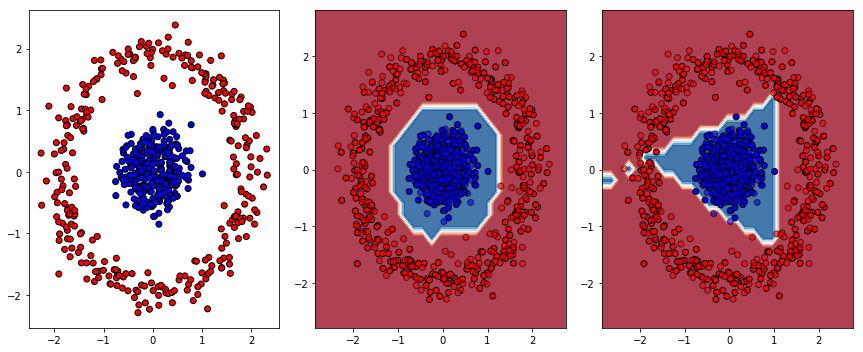

In [655]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,5,1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax = plt.subplot(1,5,2)

###################################
Z_ = prediction_loop(model2_out, Z)
Z_ = Z_.reshape(xx.shape)
ax.contourf(xx, yy, Z_, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

#####################################
Z1 = prediction_loop(model3_out, Z)
Z1 = Z1.reshape(xx.shape)
ax = plt.subplot(1,5,3)
ax.contourf(xx, yy, Z1, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
plt.tight_layout()
plt.show()

In [656]:
def plot_architectures(models, X_train, X_test, y_train, y_test):
    """
    models -> no.of models
    """
    sz = (models + 1) * 5
    figure = plt.figure(figsize=(sz,9))
    ax = plt.subplot(1,models,1)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    i = 2
    
    ## construct mesh
    h = 0.2
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    xx = torch.from_numpy(xx).double()
    yy = torch.from_numpy(yy).double()
    Z = torch.cat((xx.view(-1).unsqueeze(-1), yy.view(-1).unsqueeze(-1)),1) # predict for bounding box
    # Z to predict
    
    for m in range(1, models):
        print("No. of resnet blocks: %d" %(m))
        model = Resnet(m ,X_train.shape[1]).double()
        model_out = training_loop3(X_train, y_train, model, 100000, 0.01)
        Z_ = prediction_loop(model_out, Z)
        Z_ = Z_.reshape(xx.shape)
        ax = plt.subplot(1, models, i)
        ax.contourf(xx, yy, Z_, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        i+=1
        
    plt.tight_layout()
    plt.show()

No. of resnet blocks: 1
Epoch [1/100000] Loss: 0.8888
Epoch [10001/100000] Loss: 0.3125
Epoch [20001/100000] Loss: 0.3125
Epoch [30001/100000] Loss: 0.3125
Epoch [40001/100000] Loss: 0.3125
Epoch [50001/100000] Loss: 0.3125
Epoch [60001/100000] Loss: 0.3125
Epoch [70001/100000] Loss: 0.3125
Epoch [80001/100000] Loss: 0.3125
Epoch [90001/100000] Loss: 0.3125
No. of resnet blocks: 2
Epoch [1/100000] Loss: 0.8743
Epoch [10001/100000] Loss: 0.0008
Epoch [20001/100000] Loss: 0.0000
Epoch [30001/100000] Loss: 0.0000
Epoch [40001/100000] Loss: 0.0000
Epoch [50001/100000] Loss: 0.0000
Epoch [60001/100000] Loss: 0.0000
Epoch [70001/100000] Loss: 0.0000
Epoch [80001/100000] Loss: 0.0000
Epoch [90001/100000] Loss: 0.0000
No. of resnet blocks: 3
Epoch [1/100000] Loss: 1.1039
Epoch [10001/100000] Loss: 0.0571
Epoch [20001/100000] Loss: 0.0552
Epoch [30001/100000] Loss: 0.0547
Epoch [40001/100000] Loss: 0.0545
Epoch [50001/100000] Loss: 0.0543
Epoch [60001/100000] Loss: 0.0542
Epoch [70001/100000] L

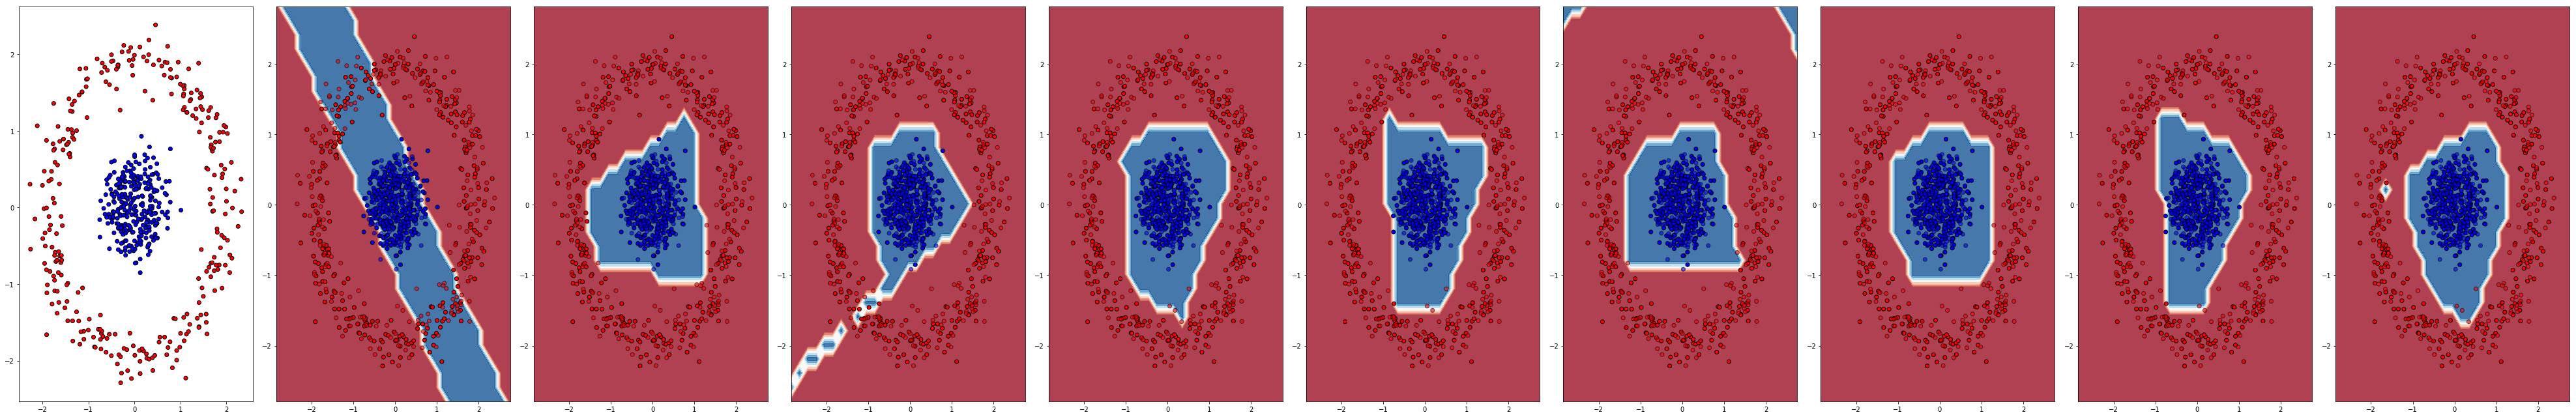

In [657]:
plot_architectures(10, X_train, X_test, y_train, y_test)